<a href="https://colab.research.google.com/github/DiVi19/Abstract_briefer/blob/main/abstract_briefer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A project by Divyansh Bisht

  1. Input Gathering and data visualisation

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:
# Create function to read the lines of a document
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:2] # the whole first example of an abstract + a little more of the next one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n']

2. Data mining

common format:
[ { 'line number': 0,
'target' : 'BACKGROUND'
'text': .....\n'
'total_lines: 11} ]

In [ ]:
def preprocess_text_with_line_numbers(filename):
  #fuction that returns a list of dictionaries of abstract line data.
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

3. Data Analysis

In [ ]:
import numpy as np
import pandas as pd
train_df=pd.DataFrame(train_samples)
test_df=pd.DataFrame(test_samples)
val_df=pd.DataFrame(val_samples)
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: xlabel='total_lines', ylabel='Count'>

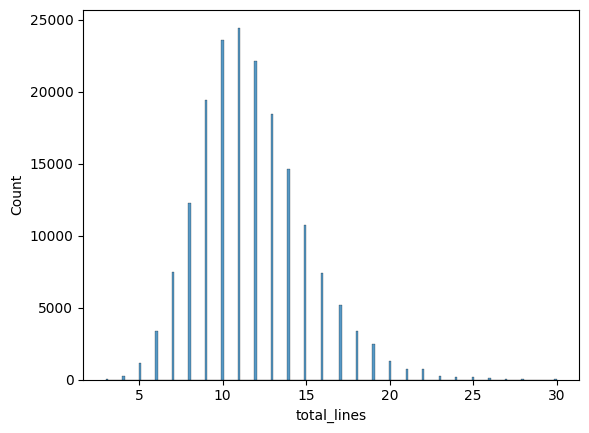

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.histplot(train_df['total_lines'])

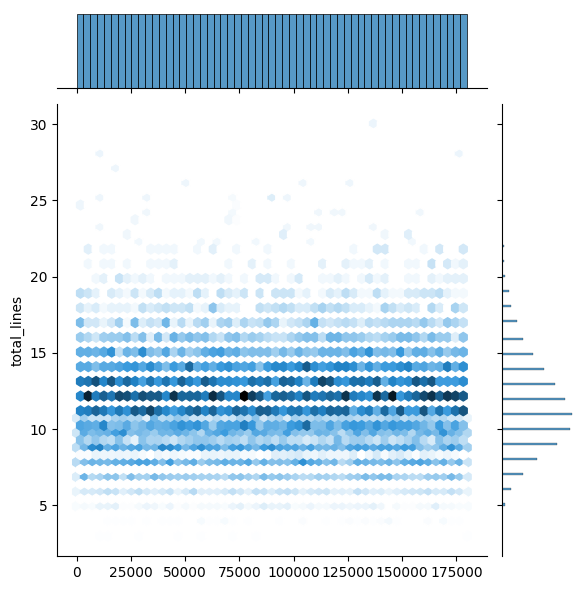

In [ ]:
sns.jointplot(train_df['total_lines'], kind='hex')

Text(0.5, 1.0, 'Kernel Density Plot for Total Lines')

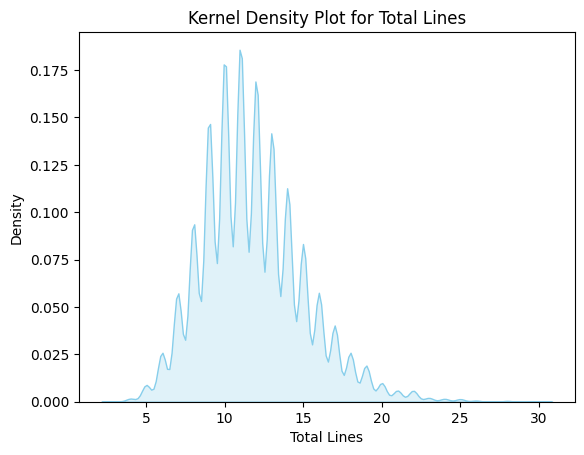

In [ ]:
sns.kdeplot(data=train_df['total_lines'], fill=True, color='skyblue')

plt.xlabel('Total Lines')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Total Lines')


In [ ]:
train_sent=train_df['text'].tolist()
val_sent=val_df['text'].tolist()
test_sent=test_df['text'].tolist()
print(f"length of train sentence= {len(train_sent)}")
print(f"length of test sentence= {len(test_sent)}")
print(f"length of validation sentence= {len(val_sent)}")
train_sent[:10]

length of train sentence= 180040
length of test sentence= 30135
length of validation sentence= 30212


['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

4. Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df['target'].to_numpy())
test_labels_encoded=label_encoder.fit_transform(test_df['target'].to_numpy())
val_labels_encoded=label_encoder.fit_transform(val_df['target'].to_numpy())
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

5. Creating models

In [ ]:
#baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
model_0.fit(train_sent, train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
print(f"accuracy= {model_0.score(val_sent, val_labels_encoded)*100}%")

accuracy= 72.1832384482987%


In [ ]:
base_preds=model_0.predict(val_sent)
base_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
base_results=calculate_results(val_labels_encoded, base_preds)
base_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
sent_len = [len(sentence.split()) for sentence in train_sent]
avg_sent_len = np.mean(sent_len)
avg_sent_len

26.338269273494777

<Axes: ylabel='Count'>

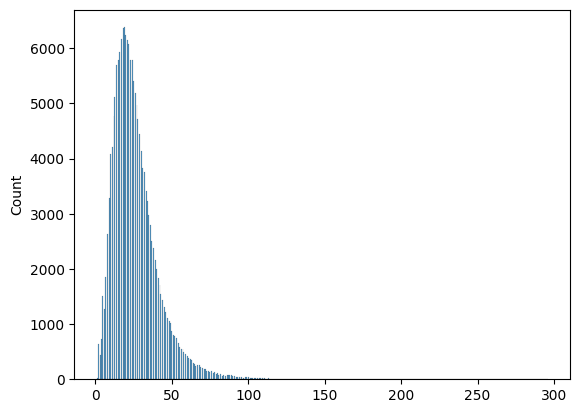

In [ ]:
sns.histplot(sent_len)

In [ ]:
#looks like after 95, the graph doesn't contain any significant information, so we'll take 95% of the data only
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len, max(sent_len)

(55, 296)

5. Vectorizing & embedding

Section 3.2 of the [PubMed 200k RCT paper](https://arxiv.org/pdf/1710.06071.pdf) states the vocabulary size of the PubMed 20k dataset is 68,000. So, that will be the max tokens value in our dataset

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vect=TextVectorization(max_tokens=68000, output_sequence_length=55)
text_vect.adapt(train_sent)

In [ ]:
import random
random_sent=random.choice(train_sent)
print(f'random sentence={random_sent}')
print(f'length of the sentence={len(random_sent.split())}')
print(f'encoded form: {text_vect([random_sent])}')

random sentence=qualified subjects were randomly assigned to one of two power toothbrush test groups : the oral-b triumph with smartguide ( marketed in the united states as the oral-b professional care smartseries @ -lsb- d@ -rsb- ) oscillating-rotating brush , or the colgate proclinical a@ ( also marketed as elmex proclinical ) sonic brush .
length of the sentence=54
encoded form: [[ 4749   104     9    92   123     6    88     4    51   817  4459   128
     24     2 15655 24254     7 34301  6079     5     2  1426  1307    25
      2 15655  2285    77 45314    46   187    45 11049  5523    16     2
   7911 13765     8   138  6079    25 39322 13765  6743  5523     0     0
      0     0     0     0     0     0     0]]


In [ ]:
rct_20k_vocab=text_vect.get_vocabulary()
len(rct_20k_vocab)

64841

In [ ]:
text_vect.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
token_embed=layers.Embedding(input_dim=len(rct_20k_vocab),
                             output_dim=128,
                             mask_zero=True,
                             name='embedding')

In [ ]:
vectorized_sent=text_vect([random_sent])
print(f'vactorized sentence: {vectorized_sent}')
embedded_sent=token_embed(vectorized_sent)
print(f'embedded sentence: {embedded_sent}')
embedded_sent.shape

vactorized sentence: [[ 4749   104     9    92   123     6    88     4    51   817  4459   128
     24     2 15655 24254     7 34301  6079     5     2  1426  1307    25
      2 15655  2285    77 45314    46   187    45 11049  5523    16     2
   7911 13765     8   138  6079    25 39322 13765  6743  5523     0     0
      0     0     0     0     0     0     0]]
embedded sentence: [[[-0.01488717 -0.04039139 -0.02084715 ... -0.02153696 -0.00484728
    0.03843495]
  [-0.02930089  0.01888213  0.01991652 ... -0.04731451  0.00164195
    0.02755984]
  [-0.00496455 -0.04406418 -0.01911242 ...  0.02280421 -0.03709029
   -0.02433717]
  ...
  [-0.04427014 -0.03188469 -0.01134638 ...  0.01076036  0.03843746
   -0.00361543]
  [-0.04427014 -0.03188469 -0.01134638 ...  0.01076036  0.03843746
   -0.00361543]
  [-0.04427014 -0.03188469 -0.01134638 ...  0.01076036  0.03843746
   -0.00361543]]]


TensorShape([1, 55, 128])

In [ ]:
train_dataset= tf.data.Dataset.from_tensor_slices((train_sent, train_labels_one_hot))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sent, val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sent, test_labels_one_hot))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_labels_one_hot.shape,

((180040, 5),)

In [ ]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Creating model

In [ ]:
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vec2=text_vect(inputs)
embed=token_embed(text_vec2)
x=layers.Conv1D(32, 5, padding='same', activation='relu')(embed)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
model_1=tf.keras.Model(inputs, outputs)
#compiling
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 32)            20512     
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 5)                 165 

In [ ]:
hist1=model_1.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=3,
                  validation_data=val_dataset, validation_steps=len(val_dataset),
                  callbacks=[create_tensorboard_callback('project', 'model_1_Conv1D')])

Saving TensorBoard log files to: project/model_1_Conv1D/20231218-112056
Epoch 1/3
5627/5627 [==============================] - 61s 10ms/step - loss: 0.6263 - accuracy: 0.7725 - val_loss: 0.5388 - val_accuracy: 0.8103
Epoch 2/3
5627/5627 [==============================] - 39s 7ms/step - loss: 0.4617 - accuracy: 0.8386 - val_loss: 0.5369 - val_accuracy: 0.8100
Epoch 3/3
5627/5627 [==============================] - 37s 7ms/step - loss: 0.3875 - accuracy: 0.8668 - val_loss: 0.5650 - val_accuracy: 0.8046


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5650 - accuracy: 0.8046


[0.564968466758728, 0.8046471476554871]

In [ ]:
mod1_pred_probs=model_1.predict(val_dataset)
mod1_pred_probs, mod1_pred_probs.shape

945/945 [==============================] - 2s 2ms/step


(array([[7.0340568e-01, 1.2778397e-02, 1.8425149e-01, 7.2612979e-02,
         2.6951516e-02],
        [6.2902570e-01, 8.1886403e-02, 3.1093033e-03, 2.7564535e-01,
         1.0333286e-02],
        [1.3313562e-01, 3.0168600e-03, 6.3718390e-04, 8.6316323e-01,
         4.7149497e-05],
        ...,
        [1.5839227e-07, 3.5150997e-06, 1.3486036e-03, 6.1489249e-07,
         9.9864715e-01],
        [1.3634025e-01, 3.7447664e-01, 3.0245915e-01, 4.0871188e-02,
         1.4585279e-01],
        [4.6533789e-03, 9.9335629e-01, 1.8332736e-03, 3.3999488e-05,
         1.2307792e-04]], dtype=float32),
 (30212, 5))

In [ ]:
mod_1_preds=tf.argmax(mod1_pred_probs, axis=1)
mod_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
mod1_results=calculate_results(y_true=val_labels_encoded,
                               y_pred=mod_1_preds)
mod1_results

{'accuracy': 80.46471600688469,
 'precision': 0.8016259604528337,
 'recall': 0.8046471600688468,
 'f1': 0.8022387087975246}

model2: Conv1D with character embeddings

In [ ]:
def split_chars(text):
  return " ".join(list(text))
split_chars(random.choice(train_sent))

'a t   @   w e e k s   a n d   @   m o n t h s   ,   t h e   n p p v   a r m   s h o w e d   s i g n i f i c a n t   i m p r o v e m e n t   i n   t d i   t o t a l   s c o r e   .'

In [ ]:
train_char = [split_chars(sentence) for sentence in train_sent]
val_chars = [split_chars(sentence) for sentence in val_sent]
test_chars = [split_chars(sentence) for sentence in test_sent]
print(train_char[1])

a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .


In [ ]:
char_len = [len(sentence) for sentence in train_sent]
mean_char_len = np.mean(char_len)
mean_char_len

149.3662574983337

<Axes: ylabel='Count'>

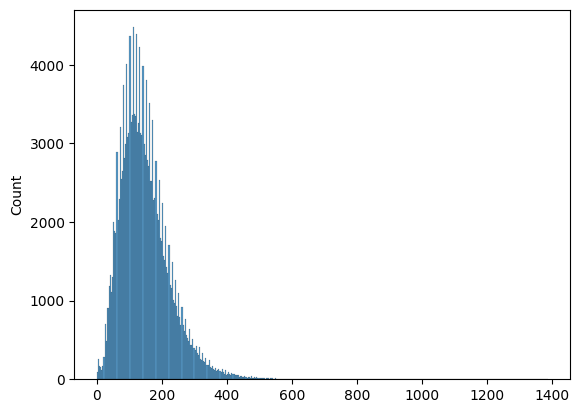

In [ ]:
sns.histplot(char_len)

(array([9.2691e+04, 7.6343e+04, 9.6890e+03, 1.0890e+03, 1.6700e+02,
        4.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03]),
 <BarContainer object of 10 artists>)

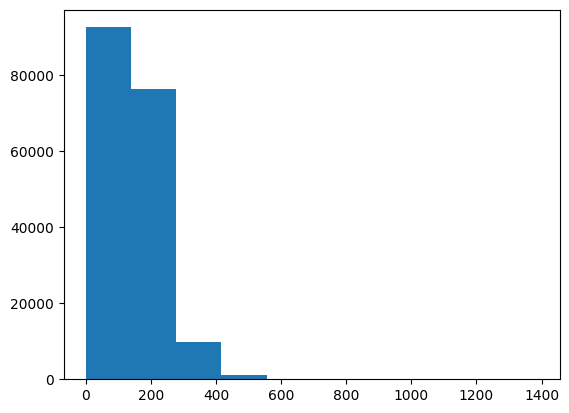

In [ ]:
plt.hist(char_len)

In [ ]:
output_seq_char_len = int(np.percentile(char_len, 95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Creating character level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # no. of characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

char_vectorizer.adapt(train_char)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars = random.choice(train_char)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h i s   s t u d y   s h o w e d   t h a t   i n   t h e   c o m b i n e d   p o p u l a t i o n   ,   o s   o f   p c   w a s   s u p e r i o r   t o   g c   ,   w h i l e   i n   t h e   c h i n e s e - o n l y   p o p u l a t i o n   ,   n o   s i g n i f i c a n t   d i f f e r e n c e   w a s   o b s e r v e d   ;   a   b e t t e r   s a f e t y   a n d   r i s k / b e n e f i t   p r o f i l e   w a s   f o u n d   i n   t h e   p c   a r m   .

Length of chars: 187

Vectorized chars:
[[ 3 13  4  9  9  3 16 10 19  9 13  7 20  2 10  3 13  5  3  4  6  3 13  2
  11  7 15 22  4  6  2 10 14  7 14 16 12  5  3  4  7  6  7  9  7 17 14 11
  20  5  9  9 16 14  2  8  4  7  8  3  7 18 11 20 13  4 12  2  4  6  3 13
   2 11 13  4  6  2  9  2  7  6 12 19 14  7 14 16 12  5  3  4  7  6  6  7
   9  4 18  6  4 17  4 11  5  6  3 10  4 17 17  2  8  2  6 11  2 20  5  9
   7 22  9  2  8 21  2 10  5 22  2  3  3  2  8  9  5 17  2  3 19  5  6 10
   8  4  9 23 22  2  6  2 17  4  3 14  8  7

creating character level embeddings:

In [ ]:
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t h i s   s t u d y   s h o w e d   t h a t   i n   t h e   c o m b i n e d   p o p u l a t i o n   ,   o s   o f   p c   w a s   s u p e r i o r   t o   g c   ,   w h i l e   i n   t h e   c h i n e s e - o n l y   p o p u l a t i o n   ,   n o   s i g n i f i c a n t   d i f f e r e n c e   w a s   o b s e r v e d   ;   a   b e t t e r   s a f e t y   a n d   r i s k / b e n e f i t   p r o f i l e   w a s   f o u n d   i n   t h e   p c   a r m   .

Embedded chars (after vectorization and embedding):
[[[-0.03741121  0.01739166  0.03456498 ... -0.00470815 -0.04653227
   -0.00596181]
  [-0.03030629 -0.01774155  0.01091249 ... -0.03073584  0.01253483
   -0.04843737]
  [ 0.02438787 -0.0316831   0.04739782 ... -0.00776428 -0.01876954
    0.03842119]
  ...
  [-0.04610881 -0.00040127  0.01862523 ...  0.00707307 -0.00444956
    0.01758057]
  [-0.04610881 -0.00040127  0.01862523 ...  0.00707307 -0.00444956
    0.01758057]
  [-0.04610881 -0

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(len(label_encoder.classes_), activation="softmax")(x)
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_conv1D_char_embedding")

# Compile model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

Model: "model_2_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_char, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
mod2_history = model_2.fit(train_char_dataset,
                              steps_per_epoch= len(train_char_dataset),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=len(val_char_dataset),
                           callbacks=[create_tensorboard_callback('project','mod3_Conv1D_CharEmbed')])

Saving TensorBoard log files to: project/mod3_Conv1D_CharEmbed/20231218-112414
Epoch 1/3
5627/5627 [==============================] - 35s 6ms/step - loss: 0.8935 - accuracy: 0.6513 - val_loss: 0.7838 - val_accuracy: 0.6996
Epoch 2/3
5627/5627 [==============================] - 36s 6ms/step - loss: 0.7488 - accuracy: 0.7153 - val_loss: 0.7400 - val_accuracy: 0.7196
Epoch 3/3
5627/5627 [==============================] - 36s 6ms/step - loss: 0.7170 - accuracy: 0.7284 - val_loss: 0.7246 - val_accuracy: 0.7254


In [ ]:
model_2.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.7246 - accuracy: 0.7254


[0.7245506048202515, 0.7253740429878235]

In [ ]:
model_2_pred_probs = model_2.predict(val_char_dataset)
model_2_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[1.2737724e-01, 1.2039074e-01, 2.4879013e-01, 4.9444300e-01,
        8.9989258e-03],
       [2.2731888e-01, 7.0008177e-01, 1.8386608e-03, 6.4175986e-02,
        6.5846667e-03],
       [1.7211759e-01, 6.4894587e-02, 2.5657337e-02, 7.2986084e-01,
        7.4696802e-03],
       ...,
       [8.6863700e-04, 4.7262372e-03, 2.3698805e-02, 3.3117598e-04,
        9.7037518e-01],
       [3.6383457e-02, 1.9851956e-01, 2.7184322e-01, 2.1260541e-02,
        4.7199327e-01],
       [1.3388754e-01, 8.1861657e-01, 4.7679907e-03, 6.8809167e-03,
        3.5846885e-02]], dtype=float32)

In [ ]:
mod3_preds = tf.argmax(model_2_pred_probs, axis=1)
mod2_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=mod3_preds)
mod2_results

{'accuracy': 72.53740235667946,
 'precision': 0.7219250590698306,
 'recall': 0.7253740235667947,
 'f1': 0.7181833736003842}

In [ ]:
mod1_results

{'accuracy': 80.46471600688469,
 'precision': 0.8016259604528337,
 'recall': 0.8046471600688468,
 'f1': 0.8022387087975246}

Model3: Combining token embeddings and character embeddings

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(len(label_encoder.classes_), activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_3 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_3_token_and_char_embeddings")
model_3.summary()

Model: "model_3_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

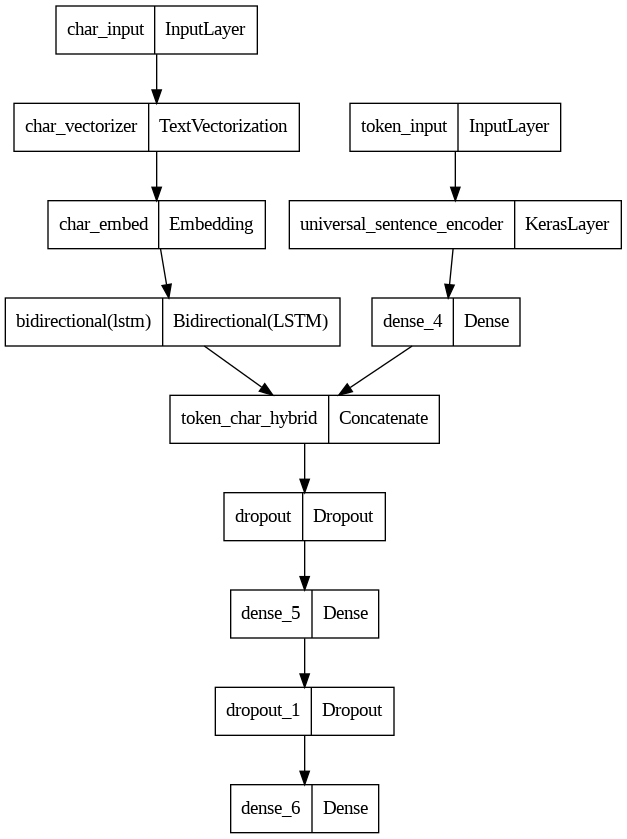

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3)

In [ ]:
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [ ]:
#combining characters and tokens in 1 dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sent, train_char)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sent, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
mod3_history = model_3.fit(train_char_token_dataset,
                          steps_per_epoch=len(train_char_token_dataset), epochs=3,
                          validation_data=val_char_token_dataset,
                          validation_steps=len(val_char_token_dataset),
                          callbacks=[create_tensorboard_callback('project', 'hybrid_model')]
                          )

Saving TensorBoard log files to: project/hybrid_model/20231218-112635
Epoch 1/3
5627/5627 [==============================] - 220s 37ms/step - loss: 0.7539 - accuracy: 0.7127 - val_loss: 0.6269 - val_accuracy: 0.7602
Epoch 2/3
5627/5627 [==============================] - 206s 37ms/step - loss: 0.6714 - accuracy: 0.7479 - val_loss: 0.5989 - val_accuracy: 0.7728
Epoch 3/3
5627/5627 [==============================] - 202s 36ms/step - loss: 0.6474 - accuracy: 0.7565 - val_loss: 0.5832 - val_accuracy: 0.7766


In [ ]:
model_3.evaluate(val_char_token_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.5832 - accuracy: 0.7766


[0.5832112431526184, 0.7766450643539429]

In [ ]:
model_3_pred_probs = model_3.predict(val_char_token_dataset)
model_3_pred_probs

945/945 [==============================] - 19s 19ms/step


array([[5.5680335e-01, 2.6632437e-01, 1.7078778e-03, 1.6854031e-01,
        6.6239866e-03],
       [4.5365542e-01, 4.1407505e-01, 1.6764182e-03, 1.2889642e-01,
        1.6965750e-03],
       [5.3956383e-01, 3.8839499e-03, 2.4306038e-02, 4.3057841e-01,
        1.6676979e-03],
       ...,
       [1.5794663e-05, 2.1088593e-04, 6.2187510e-03, 6.0810285e-06,
        9.9354845e-01],
       [1.5333420e-02, 1.2622406e-01, 7.3431835e-02, 6.0531567e-03,
        7.7895755e-01],
       [7.2086630e-03, 9.9194455e-01, 4.3475314e-04, 4.4575732e-05,
        3.6735492e-04]], dtype=float32)

In [ ]:
mod3_preds = tf.argmax(model_3_pred_probs, axis=1)
mod3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [ ]:
mod3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=mod3_preds)
mod3_results

{'accuracy': 77.66450417052828,
 'precision': 0.7756645545696513,
 'recall': 0.7766450417052827,
 'f1': 0.7732718056093945}

Model 4: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: xlabel='line_number', ylabel='Count'>

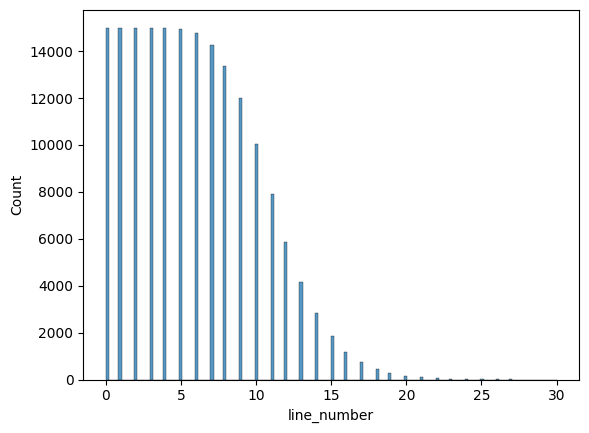

In [ ]:
sns.histplot(train_df.line_number)

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:10]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

In [ ]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: xlabel='total_lines', ylabel='Count'>

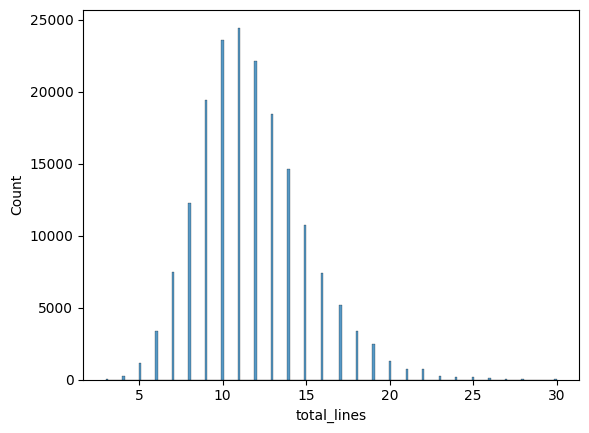

In [ ]:
sns.histplot(train_df.total_lines)

In [ ]:
#Looking at the distribution of our 'total lines' column, a value of 20 looks like it covers the majority of samples.
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

Creating the model:

1. Create a token-level model (similar to model 1)

In [ ]:
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

2. Create a character-level model(Similar to model 2)

In [ ]:
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

3. Create a "line_number" model (takes in one-hot-encoded "line_number" tensor and passes it through a non-linear layer)

In [ ]:
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

4. Create a "total_lines" model (takes in one-hot-encoded "total_lines" tensor and passes it through a non-linear layer)

In [ ]:
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

5. 5. Combine token and char embeddings into a hybrid embedding

In [ ]:
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding


In [ ]:
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

7. Create an output layer to accept the tribrid embedding and output predicted label probabilities

In [ ]:
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a model

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

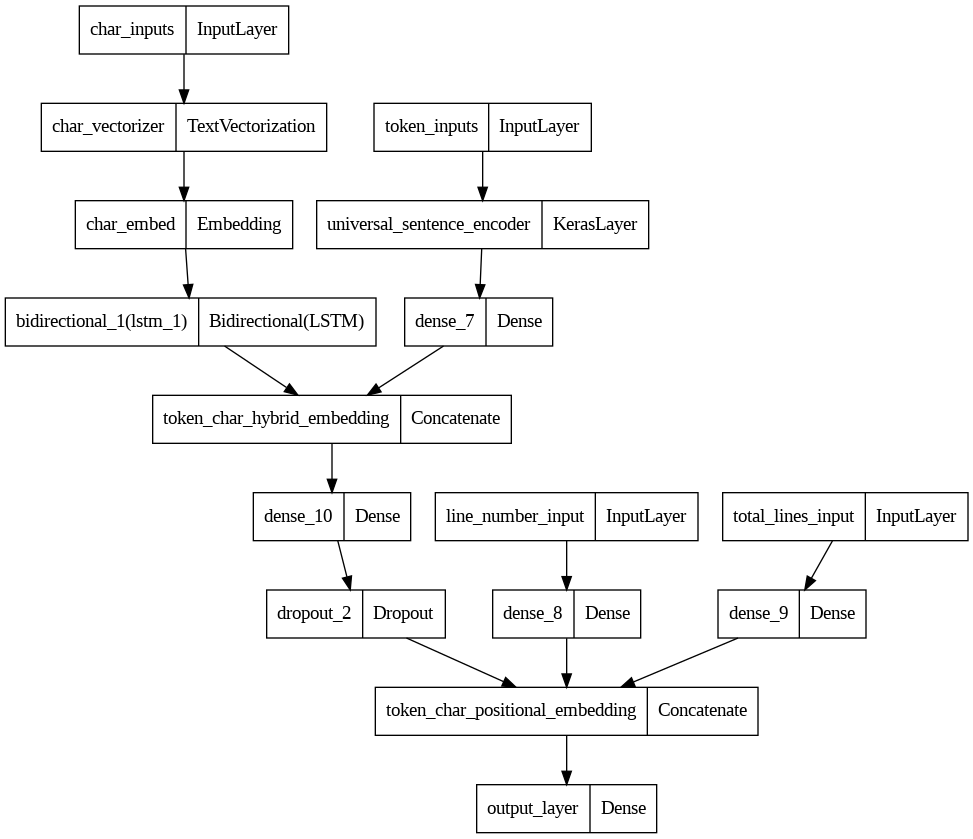

In [ ]:
model_4 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)
model_4.summary()
plot_model(model_4)

In [ ]:
for layer in model_4.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7d618d9c4a30> True
<keras.src.engine.input_layer.InputLayer object at 0x7d618da38250> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7d60bcca9450> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7d60a29f1480> False
<keras.src.layers.core.embedding.Embedding object at 0x7d60bccbf9d0> True
<keras.src.layers.core.dense.Dense object at 0x7d618d993a60> True
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7d618d815d20> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7d618d882830> True
<keras.src.engine.input_layer.InputLayer object at 0x7d60bf9877f0> True
<keras.src.engine.input_layer.InputLayer object at 0x7d618d883550> True
<keras.src.layers.core.dense.Dense object at 0x7d618d8fd8a0> True
<keras.src.layers.core.dense.Dense object at 0x7d618d8156f0> True
<keras.src.layers.core.dense.Dense object at 0x7d618d882bc0> True
<keras.src.layers.regularization.dropout.

In [ ]:
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),#label smoothing prevents overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Creating datasets...(again?)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sent,
                                                                train_char))
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sent,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
mod4_history = model_4.fit(train_pos_char_token_dataset,
                              steps_per_epoch=len(train_pos_char_token_dataset),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=len(val_pos_char_token_dataset),
                           callbacks=[create_tensorboard_callback('project', 'mod4_tribrid')])

Saving TensorBoard log files to: project/mod4_tribrid/20231218-113934
Epoch 1/3
5627/5627 [==============================] - 218s 38ms/step - loss: 0.9531 - accuracy: 0.8243 - val_loss: 0.9080 - val_accuracy: 0.8497
Epoch 2/3
5627/5627 [==============================] - 204s 36ms/step - loss: 0.9084 - accuracy: 0.8544 - val_loss: 0.8987 - val_accuracy: 0.8536
Epoch 3/3
5627/5627 [==============================] - 206s 37ms/step - loss: 0.8962 - accuracy: 0.8632 - val_loss: 0.8955 - val_accuracy: 0.8554


In [ ]:
mod4_pred_probs = model_4.predict(val_pos_char_token_dataset, verbose=1)
mod4_pred_probs

945/945 [==============================] - 19s 19ms/step


array([[0.5844066 , 0.08765956, 0.02237505, 0.2757015 , 0.02985717],
       [0.5836385 , 0.11142807, 0.0524445 , 0.23202752, 0.02046146],
       [0.37797847, 0.0857911 , 0.04374721, 0.44276538, 0.04971792],
       ...,
       [0.02496426, 0.06510753, 0.01407932, 0.03149803, 0.86435086],
       [0.02022668, 0.48237005, 0.04392146, 0.02167624, 0.43180564],
       [0.04518171, 0.87830037, 0.03393461, 0.01767478, 0.02490846]],
      dtype=float32)

In [ ]:
mod4_preds = tf.argmax(mod4_pred_probs, axis=1)
mod4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=mod4_preds)
mod4_results

{'accuracy': 85.53554878856083,
 'precision': 0.8574655276604974,
 'recall': 0.8553554878856083,
 'f1': 0.8523335496632884}

In [ ]:
#Comparing our models
all_model_results = pd.DataFrame({"base_model": base_results,
                                  "custom_token_embed_conv1d": mod1_results,
                                  "custom_char_embed_conv1d": mod2_results,
                                  "hybrid_char_token_embed": mod3_results,
                                  "tribrid_pos_char_token_embed": mod4_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
base_model,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,80.464716,0.801626,0.804647,0.802239
custom_char_embed_conv1d,72.537402,0.721925,0.725374,0.718183
hybrid_char_token_embed,77.664504,0.775665,0.776645,0.773272
tribrid_pos_char_token_embed,85.535549,0.857466,0.855355,0.852334


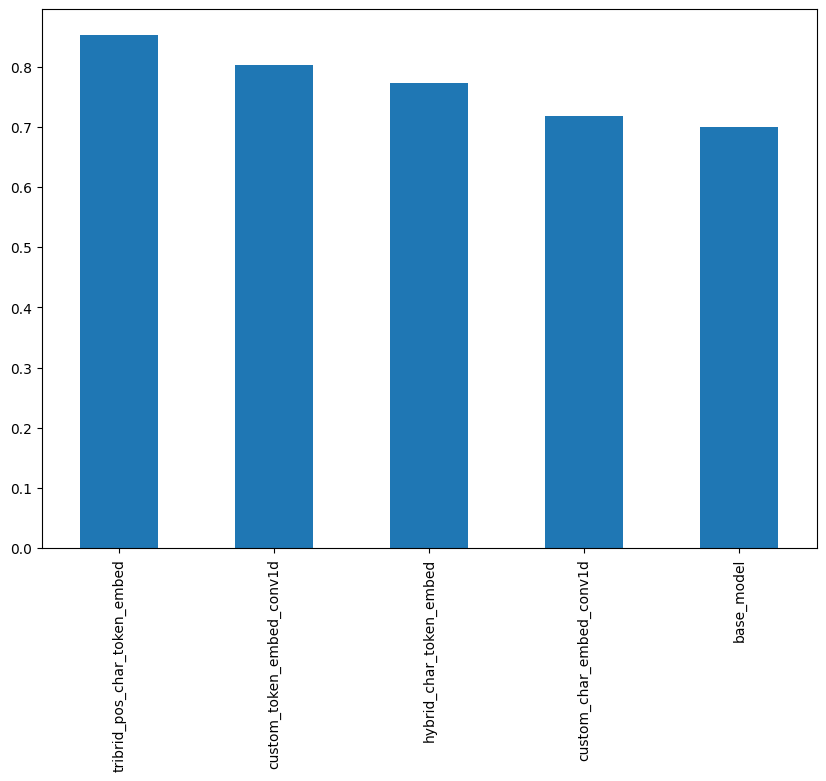

In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

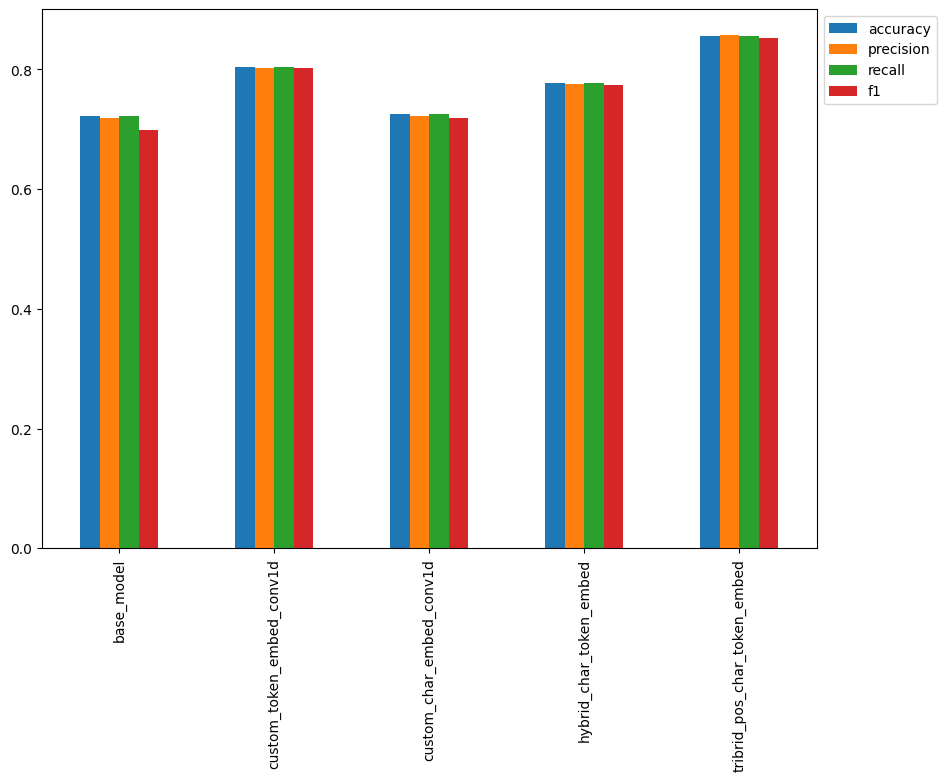

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

In [ ]:
model_4.save("abstract_briefer_tribrid_model")

In [ ]:
loaded_model=tf.keras.models.load_model("abstract_briefer_tribrid_model")

In [ ]:
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 22s 22ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 85.53554878856083,
 'precision': 0.8574655276604974,
 'recall': 0.8553554878856083,
 'f1': 0.8523335496632884}

Evaluate model

In [ ]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sent,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

942/942 [==============================] - 19s 20ms/step


{'accuracy': 85.22979923676787,
 'precision': 0.8533608074851233,
 'recall': 0.8522979923676788,
 'f1': 0.8492386293169287}

Find incorrect predictions

In [ ]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes[:10]

['BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND']

In [ ]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(10)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,BACKGROUND,0.382427,True
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,METHODS,0.545449,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.860880,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.794661,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.770072,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.873743,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.671944,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.647784,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,CONCLUSIONS,0.537229,True
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.652650,True


In [ ]:
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
1827,CONCLUSIONS,nct@ ( clinicaltrials.gov ) .,18,18,BACKGROUND,0.936960,False
8545,METHODS,pretest-posttest .,1,11,BACKGROUND,0.932264,False
16347,BACKGROUND,to evaluate the effects of the lactic acid bac...,0,12,OBJECTIVE,0.930556,False
22736,OBJECTIVE,"the national institute of oncology , budapest ...",4,20,METHODS,0.929168,False
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.922553,False
...,...,...,...,...,...,...,...
12458,RESULTS,home monitoring patients were assessed remotel...,3,13,METHODS,0.852368,False
27182,METHODS,ninety patients were enrolled .,4,8,RESULTS,0.852266,False
16877,RESULTS,primary efficacy endpoint was trough forced ex...,4,13,METHODS,0.852140,False
20904,CONCLUSIONS,neurofeedback participants made more prompt an...,8,9,RESULTS,0.851974,False


In [ ]:
#check wrong predictions
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9369598627090454, Line number: 18, Total lines: 18

Text:
nct@ ( clinicaltrials.gov ) .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9322635531425476, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9305561184883118, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: OBJECTIVE, Pred: METHODS, Prob: 0.9291678071022034, Line number: 4, Total lines: 20

Text:
the national institute of oncology , budapest conducted a single centre randomized clinical study .

-----

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.922552764415741, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: METHODS, Pred: RESULTS, Prob: 0.921879231929779, Line number: 7, Total lines: 10

Text:
of the @ dogs receiving placeb

Making example predictions

In [ ]:
import json
!wget https://raw.githubusercontent.com/DiVi19/Abstract_briefer/main/examples/example1.json
with open("example1.json", "r") as f:
  example_abstracts = json.load(f)
example_abstracts

--2023-12-18 11:53:52--  https://raw.githubusercontent.com/DiVi19/Abstract_briefer/main/examples/example1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘example1.json’

example1.json       100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-12-18 11:53:53 (76.0 MB/s) - ‘example1.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


using spaCy to turn this data from a big chunk of text into sentences.

In [ ]:
from spacy.lang.en import English

# setup English sentence parser
nlp = English()

# create sentence splitting pipeline object
sentencizer = nlp.create_pipe("sentencizer")

# add sentence splitting pipeline object to sentence parser
nlp.add_pipe('sentencizer')

# create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])

# return detected sentences from doc in string type (not spaCy token type)
abstract_lines = [str(sent) for sent in list(doc.sents)]

abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [ ]:
def split_chars(text):
    return ' '.join(list(text))

In [ ]:
def make_predictions(text):

    classes = ['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']
    abstract_lines = list()

    abstract_lines = spacy_function(text)


    # Get total number of lines
    total_lines_in_sample = len(abstract_lines)

    # Go through each line in abstract and create a list of dictionaries containing features for each line
    sample_lines = []
    for i, line in enumerate(abstract_lines):
        sample_dict = {}
        sample_dict["text"] = str(line)
        sample_dict["line_number"] = i
        sample_dict["total_lines"] = total_lines_in_sample - 1
        sample_lines.append(sample_dict)

    # Get all line_number values from sample abstract
    test_abstract_line_numbers = [line["line_number"] for line in sample_lines]

    # One-hot encode to same depth as training data, so model accepts right input shape
    test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)

    # Get all total_lines values from sample abstract
    test_abstract_total_lines = [line["total_lines"] for line in sample_lines]

    # One-hot encode to same depth as training data, so model accepts right input shape
    test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)

    # Split abstract lines into characters
    abstract_chars = [split_chars(sentence) for sentence in abstract_lines]

    # Make predictions on sample abstract features
    test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                       test_abstract_total_lines_one_hot,
                                                       tf.constant(abstract_lines),
                                                       tf.constant(abstract_chars)))

    test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)

    test_abstract_pred_classes = [classes[i] for i in test_abstract_preds]

    return (test_abstract_pred_classes, abstract_lines)

In [ ]:
example_abstracts[1]['abstract']

"Postpartum depression (PPD) is the most prevalent mood disorder associated with childbirth. No single cause of PPD has been identified, however the increased risk of nutritional deficiencies incurred through the high nutritional requirements of pregnancy may play a role in the pathology of depressive symptoms. Three nutritional interventions have drawn particular interest as possible non-invasive and cost-effective prevention and/or treatment strategies for PPD; omega-3 (n-3) long chain polyunsaturated fatty acids (LCPUFA), vitamin D and overall diet. We searched for meta-analyses of randomised controlled trials (RCT's) of nutritional interventions during the perinatal period with PPD as an outcome, and checked for any trials published subsequently to the meta-analyses. Fish oil: Eleven RCT's of prenatal fish oil supplementation RCT's show null and positive effects on PPD symptoms. Vitamin D: no relevant RCT's were identified, however seven observational studies of maternal vitamin D 

In [ ]:
text = example_abstracts[3]['abstract']
pred, lines = make_predictions(text)
pred

1/1 [==============================] - 0s 35ms/step


['BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS']

In [ ]:
for i, line in enumerate(abstract_lines):
    print(f"{pred[i]}: {line}")

BACKGROUND: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
BACKGROUND: Participants were randomly assigned to treatment or wait-list conditions.
BACKGROUND: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
RESULTS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
METHODS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


In [ ]:
objective = ''
background = ''
method = ''
conclusion = ''
result = ''
for i, line in enumerate(lines):
    if pred[i] == 'OBJECTIVE':
        objective = objective + line

    elif pred[i] == 'BACKGROUND':
        background = background + line

    elif pred[i] == 'METHODS':
        method = method + line

    elif pred[i] == 'RESULTS':
        result = result + line

    elif pred[i] == 'CONCLUSIONS':
        conclusion = conclusion + line

In [ ]:
objective

''

In [ ]:
background

'Hepatitis C virus (HCV) and alcoholic liver disease (ALD), either alone or in combination, count for more than two thirds of all liver diseases in the Western world.There is no safe level of drinking in HCV-infected patients and the most effective goal for these patients is total abstinence.Baclofen, a GABA(B) receptor agonist, represents a promising pharmacotherapy for alcohol dependence (AD).'

In [ ]:
result

"The goal of this post-hoc analysis was to explore baclofen's effect in a subgroup of alcohol-dependent HCV-infected cirrhotic patients.Any patient with HCV infection was selected for this analysis.Among the 84 subjects randomized in the main trial, 24 alcohol-dependent cirrhotic patients had a HCV infection; 12 received baclofen 10mg t.i.d.With respect to the placebo group (3/12, 25.0%), a significantly higher number of patients who achieved and maintained total alcohol abstinence was found in the baclofen group (10/12, 83.3%; p=0.0123).Furthermore, in the baclofen group, compared to placebo, there was a significantly higher increase in albumin values from baseline (p=0.0132) and a trend toward a significant reduction in INR levels from baseline (p=0.0716)."

In [ ]:
conclusion

'In conclusion, baclofen was safe and significantly more effective than placebo in promoting alcohol abstinence, and improving some Liver Function Tests (LFTs) (i.e. albumin, INR) in alcohol-dependent HCV-infected cirrhotic patients.Baclofen may represent a clinically relevant alcohol pharmacotherapy for these patients.'